In [36]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools.mask import decode
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [9]:
dataDir='../../coco-master'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [10]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=22.75s)
creating index...
index created!


In [15]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

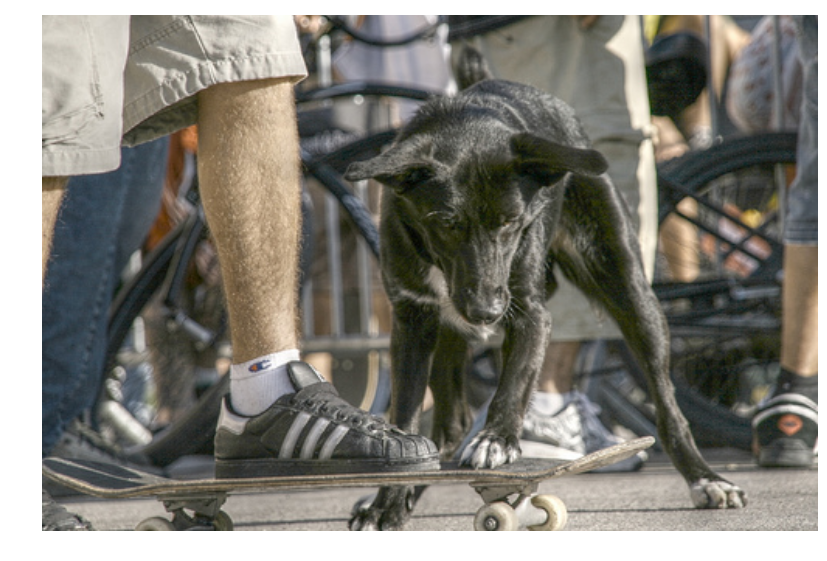

In [30]:
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

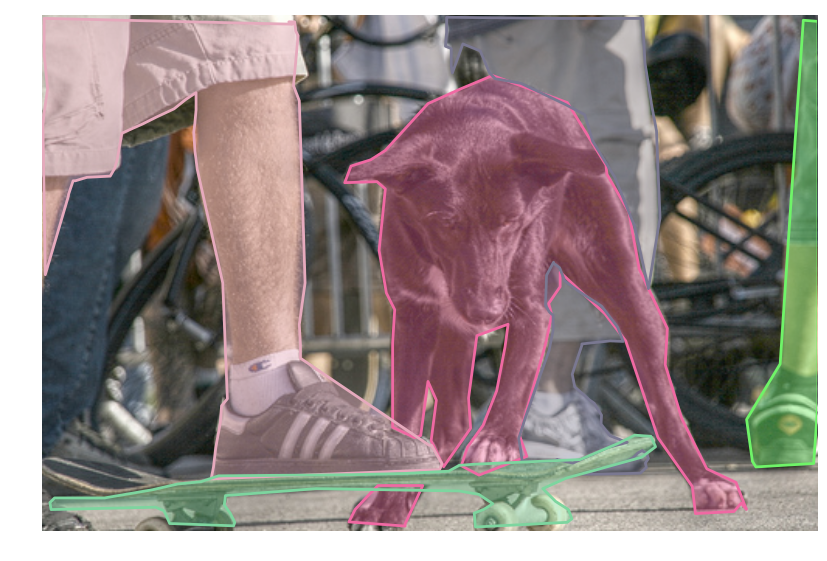

In [17]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [18]:
I.shape

(333L, 500L, 3L)

In [31]:
I = cv2.resize(I, (224, 224))
I[:, :, 0] -= 103.939
I[:, :, 1] -= 116.779
I[:, :, 2] -= 123.68

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [23]:
I.shape

(224L, 224L, 3L)

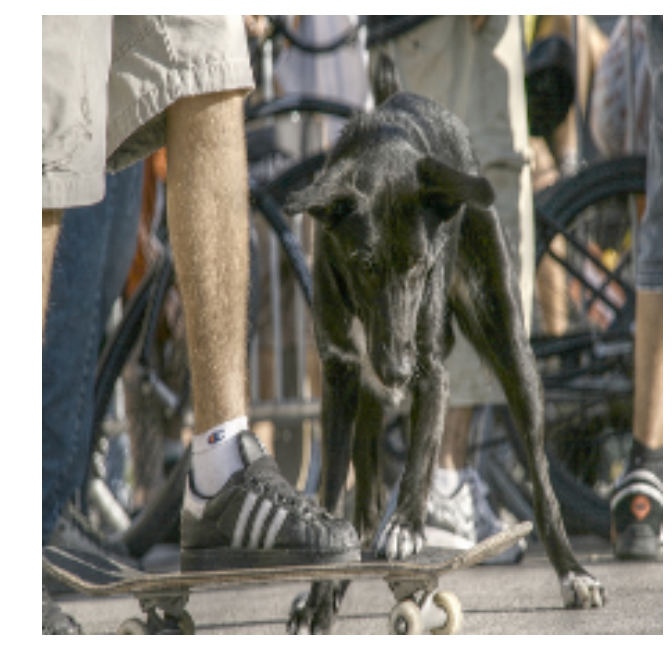

In [27]:
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

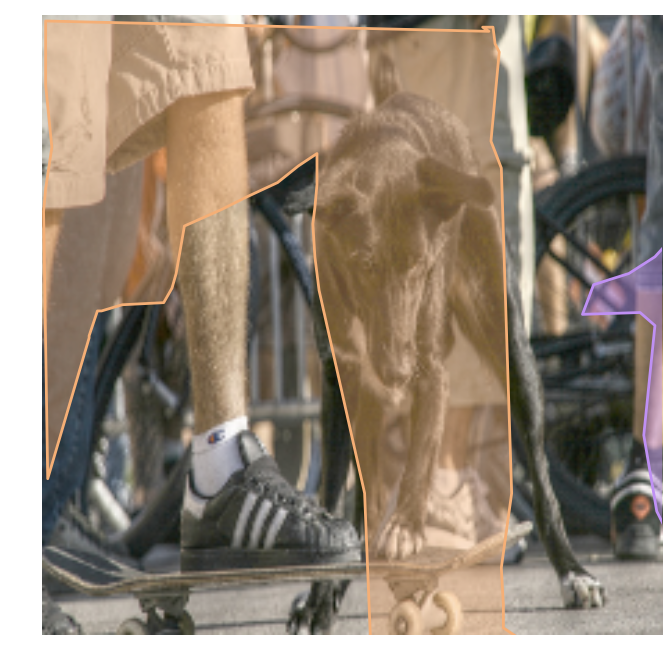

In [28]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [37]:
m = decode(anns)

KeyError: 'counts'